<a href="https://colab.research.google.com/github/GustavoEmanuel901/Analise-dados-de-saude-mental-curitiba/blob/main/Analise_dos_dados_Curitiba_Sa%C3%BAde_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import unicodedata
from datetime import datetime
import os
import seaborn as sns

In [4]:
#https://www.curitiba.pr.gov.br/dadosabertos/busca/?pagina=8
data = pd.read_csv('2024-10-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv', sep=';', encoding='latin-1')

data.head()

<ipython-input-4-b0ec242bc425>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('2024-10-06_Sistema_E-Saude_Medicos_-_Base_de_Dados.csv', sep=';', encoding='latin-1')


,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
0,01/05/2024 01:06:58,14/12/1978 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NaN,NaN,NaN,TUNAS DO PARANA,BAIRRO NAO INFORMADO,Brasileira,8915683,2,2,15641
1,01/05/2024 02:07:14,12/05/2012 00:00:00,M,2,UPA,9214097,UPA TATUQUARA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NaN,NaN,NaN,CURITIBA,TATUQUARA,Brasileira,12061371,1,1,97106
2,01/05/2024 00:35:51,23/06/2015 00:00:00,F,2,UPA,17396,UPA BOA VISTA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,OUTROS,OUTROS,OUTROS,CURITIBA,CENTRO,Brasileira,10096914,1,1,15641
3,01/05/2024 01:21:32,09/05/1998 00:00:00,F,2,UPA,9214097,UPA TATUQUARA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,TATUQUARA,Brasileira,11538719,1,1,119831
4,01/05/2024 00:18:56,08/01/2004 00:00:00,M,2,UPA,2639556,UPA SITIO CERCADO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SITIO CERCADO,Brasileira,4368343,1,1,119721


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200779 entries, 0 to 1200778
Data columns (total 42 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   Data do Atendimento                           1200779 non-null  object 
 1   Data de Nascimento                            1200779 non-null  object 
 2   Sexo                                          1200779 non-null  object 
 3   Código do Tipo de Unidade                     1200779 non-null  int64  
 4   Tipo de Unidade                               1200779 non-null  object 
 5   Código da Unidade                             1200779 non-null  int64  
 6   Descrição da Unidade                          1200779 non-null  object 
 7   Código do Procedimento                        1200779 non-null  int64  
 8   Descrição do Procedimento                     1200779 non-null  object 
 9   Código do CBO                      

# Filtrando Dados para transtornos mentais

In [6]:
transtornos_mentais = data[data['Código do CID'].str.contains('F', na=False)]

transtornos_mentais.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
35,01/05/2024 00:31:03,13/11/1961 00:00:00,F,2,UPA,2438917,UPA BOQUEIRAO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,GANCHINHO,Brasileira,1245124,1,1,123518
102,01/05/2024 01:50:35,13/12/1980 00:00:00,M,2,UPA,2639548,UPA CAMPO COMPRIDO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,SANTO INACIO,Brasileira,8732671,1,1,48392
107,01/05/2024 01:55:50,17/10/1989 00:00:00,M,2,UPA,9214097,UPA TATUQUARA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NaN,NaN,NaN,CURITIBA,CAMPO DE SANTANA,Brasileira,12012795,1,1,119831
122,01/05/2024 02:29:48,10/04/1998 00:00:00,F,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAJURU,Brasileira,2400783,1,1,123492
129,01/05/2024 02:54:36,21/03/1992 00:00:00,F,2,UPA,2639467,UPA FAZENDINHA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,104898,1,1,117965


# Análise Quantitavia

In [7]:
doencas = transtornos_mentais['Descrição do CID'].unique()

doencas

array(['TRANSTORNO PSICOTICO AGUDO E TRANSITORIO NAO ESPECIFICADO',
       'ANSIEDADE GENERALIZADA',
       'TRANSTORNOS MENTAIS E COMPORT. DEVIDOS USO DE ALCOOL - INTOXICACAO AGUDA',
       'TRANSTORNO ANSIOSO NAO ESPECIFICADO',
       'TRANSTORNOS MENTAIS E COMPORT. DEV. USO COCAINA - OUTROS TRANSTORNOS MENTAIS OU COMPORTAMENTAIS',
       'TRANSTORNO NAO ESPECIFICADO DO DESENVOLVIMENTO DAS HABILIDADES ESCOLARES',
       'AUTISMO INFANTIL', 'EPISODIO DEPRESSIVO MODERADO',
       'SINTOMAS FISICOS AUMENTADOS POR FATORES PSICOLOGICOS',
       'DEMENCIA NAO ESPECIFICADA',
       'TRANSTORNOS MENTAIS E COMPORT. DEVIDOS USO DE ALCOOL - TRANSTORNO MENTAL OU COMPORT. NAO ESPECIFICADO',
       'TRANSTORNO MENTAL NAO ESPECIFICADO EM OUTRA PARTE',
       'TRANSTORNO DE PANICO [ANSIEDADE PAROXISTICA EPISODICA]',
       'TRANSTORNO AFETIVO BIPOLAR, ATUALMENTE EM REMISSAO',
       'RETARDO MENTAL NAO ESPECIFICADO - OUTROS COMPROMETIMENTOS DO COMPORTAMENTO',
       'INSONIA NAO-ORGANICA',
       'T

In [8]:
# Quantidades de doenças
doencas.size

359

In [9]:
#Quantidade de ocorrencias
transtornos_mentais.size

2383038

In [10]:
contagem = transtornos_mentais['Descrição do CID'].value_counts().reset_index()

contagem.columns = ['Descrição do CID (Transtorno)' ,'Quantidade']

# Ordenar os resultados
contagem_ordenada = contagem.sort_values(by='Quantidade', ascending=False)

contagem_ordenada.head(20)

,Descrição do CID (Transtorno),Quantidade
0,ANSIEDADE GENERALIZADA,16066
1,TRANSTORNO ANSIOSO NAO ESPECIFICADO,4401
2,AUTISMO INFANTIL,3187
3,DISTURBIOS DA ATIVIDADE E DA ATENCAO,2168
4,TRANSTORNO MISTO ANSIOSO E DEPRESSIVO,1905
5,EPISODIO DEPRESSIVO NAO ESPECIFICADO,1783
6,EPISODIO DEPRESSIVO MODERADO,1578
7,TRANSTORNO DO HUMOR [AFETIVO] NAO ESPECIFICADO,1403
8,ESQUIZOFRENIA PARANOIDE,1376
9,TRANSTORNO AFETIVO BIPOLAR NAO ESPECIFICADO,1054


In [11]:
contagem_ordenada.to_csv('contagem_numero_de_ocorrencias_de_cada_transtorno.csv', sep=';')

# Agrupamento por cod_usuario
## Para criar histórico de cada paciente

In [12]:
grupo = transtornos_mentais.groupby(['cod_usuario'])

In [13]:
grupo.get_group(162866)['Descrição do CID']

<ipython-input-13-3c102ab380bf>:1: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grupo.get_group(162866)['Descrição do CID']


,Descrição do CID
208004,ANSIEDADE GENERALIZADA
346815,ANSIEDADE GENERALIZADA
398786,TRANSTORNO ANSIOSO NAO ESPECIFICADO
398787,TRANSTORNO ANSIOSO NAO ESPECIFICADO
423657,TRANSTORNO FOBICO-ANSIOSO NAO ESPECIFICADO
564390,ANSIEDADE GENERALIZADA
649590,TRANSTORNOS MENTAIS E COMPORT. DEV. USO SEDAT....
871433,EPISODIO DEPRESSIVO MODERADO
936736,ANSIEDADE GENERALIZADA
936737,TRANSTORNO ANSIOSO NAO ESPECIFICADO


In [15]:
grouped = transtornos_mentais.groupby('cod_usuario').apply(lambda x: x.to_dict(orient='records')).reset_index(name='registros')

grouped.head()

<ipython-input-15-04b989b13807>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = transtornos_mentais.groupby('cod_usuario').apply(lambda x: x.to_dict(orient='records')).reset_index(name='registros')


,cod_usuario,registros
0,93,[{'Data do Atendimento': '11/05/2024 19:37:38'...
1,219,[{'Data do Atendimento': '09/07/2024 13:48:33'...
2,253,[{'Data do Atendimento': '04/06/2024 15:24:37'...
3,441,[{'Data do Atendimento': '25/07/2024 11:34:44'...
4,494,[{'Data do Atendimento': '11/06/2024 15:23:31'...


In [ ]:
grouped.to_csv('registros_agrupados.csv', index=False, sep=";")

# Análise Demográfica

## Distribuição por Sexo

### Para fazer analises resolvi remover o outlier

In [17]:
transtornos_mentais_limpo = transtornos_mentais[transtornos_mentais['Descrição do CID'] != 'ANSIEDADE GENERALIZADA']

transtornos_mentais_limpo.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Grupo Comunitário,Meio de Comunicacao,Meio de Transporte,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional
35,01/05/2024 00:31:03,13/11/1961 00:00:00,F,2,UPA,2438917,UPA BOQUEIRAO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,OUTROS,"TELEVISAO,RADIO",ONIBUS,CURITIBA,GANCHINHO,Brasileira,1245124,1,1,123518
122,01/05/2024 02:29:48,10/04/1998 00:00:00,F,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO",ONIBUS,CURITIBA,CAJURU,Brasileira,2400783,1,1,123492
129,01/05/2024 02:54:36,21/03/1992 00:00:00,F,2,UPA,2639467,UPA FAZENDINHA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,"TELEVISAO,RADIO,OUTROS","ONIBUS,CARRO",CURITIBA,CIDADE INDUSTRIAL,Brasileira,104898,1,1,117965
251,01/05/2024 06:50:10,20/07/1967 00:00:00,M,2,UPA,2438917,UPA BOQUEIRAO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,NAO PARTICIPA,TELEVISAO,ONIBUS,CURITIBA,CENTRO,Brasileira,408635,1,1,115248
332,01/05/2024 07:48:30,06/01/1978 00:00:00,F,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,NAO PARTICIPA,RADIO,ONIBUS,CURITIBA,PINHEIRINHO,Brasileira,1149302,1,1,42436


In [21]:
distribuicao_sexo = transtornos_mentais_limpo['Sexo'].value_counts().reset_index()

# Renomear as colunas para melhor entendimento
distribuicao_sexo.columns = ['Sexo', 'Quantidade']

# Exibir a distribuição
distribuicao_sexo.head()

,Sexo,Quantidade
0,F,23200
1,M,17473


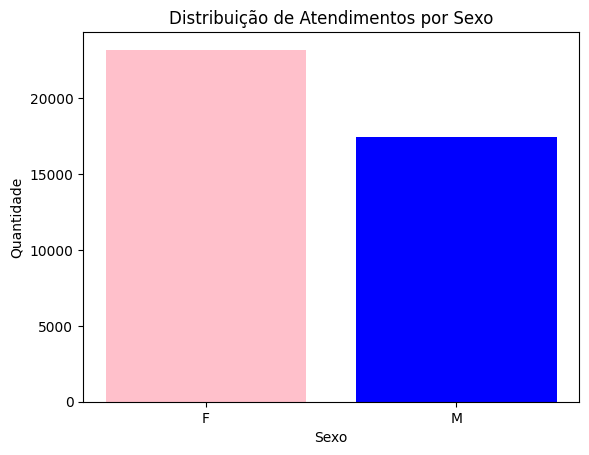

In [19]:
# Criar um gráfico de barras
plt.bar(distribuicao_sexo['Sexo'], distribuicao_sexo['Quantidade'], color=['pink', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.title('Distribuição de Atendimentos por Sexo')
plt.show()

## Analise de Idade

In [22]:
# Converter a coluna de Data de Nascimento para o tipo datetime
transtornos_mentais['Data de Nascimento'] = pd.to_datetime(transtornos_mentais['Data de Nascimento'])

<ipython-input-22-681ac97f8ef4>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  transtornos_mentais['Data de Nascimento'] = pd.to_datetime(transtornos_mentais['Data de Nascimento'])
<ipython-input-22-681ac97f8ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transtornos_mentais['Data de Nascimento'] = pd.to_datetime(transtornos_mentais['Data de Nascimento'])


In [23]:
# Calcular a idade
hoje = datetime.now()

transtornos_mentais['Idade'] = hoje.year - transtornos_mentais['Data de Nascimento'].dt.year - (
    (hoje.month < transtornos_mentais['Data de Nascimento'].dt.month) |
    ((hoje.month == transtornos_mentais['Data de Nascimento'].dt.month) & (hoje.day < transtornos_mentais['Data de Nascimento'].dt.day))
)

<ipython-input-23-e829f9d7004a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transtornos_mentais['Idade'] = hoje.year - transtornos_mentais['Data de Nascimento'].dt.year - (


In [27]:

# Definir os limites dos grupos etários
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']

In [28]:
# Criar a coluna de grupos etários
transtornos_mentais['Grupo Etário'] = pd.cut(transtornos_mentais['Idade'], bins=bins, labels=labels, right=False)

<ipython-input-28-82cbbae9d6a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transtornos_mentais['Grupo Etário'] = pd.cut(transtornos_mentais['Idade'], bins=bins, labels=labels, right=False)


In [29]:
transtornos_mentais_limpo = transtornos_mentais[transtornos_mentais['Descrição do CID'] != 'ANSIEDADE GENERALIZADA']

In [30]:
# Contar a distribuição por grupo etário
distribuicao_etaria = transtornos_mentais_limpo['Grupo Etário'].value_counts().reset_index()

In [31]:
# Renomear as colunas para melhor entendimento
distribuicao_etaria.columns = ['Grupo Etário', 'Quantidade']

distribuicao_etaria

,Grupo Etário,Quantidade
0,19-35,9925
1,0-18,9162
2,36-50,8958
3,51-65,7807
4,66+,4821


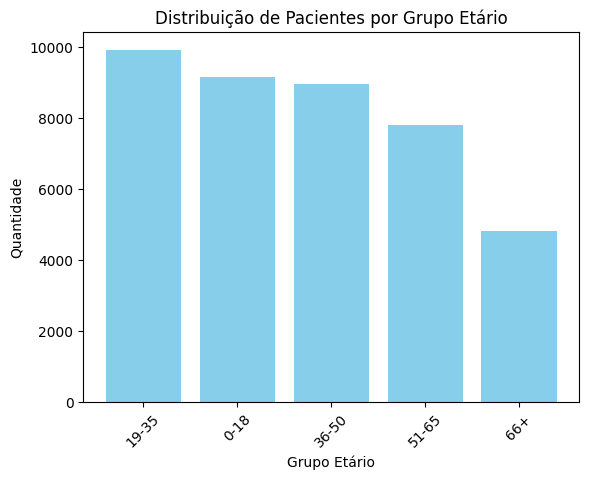

In [32]:
plt.bar(distribuicao_etaria['Grupo Etário'], distribuicao_etaria['Quantidade'], color='skyblue')
plt.xlabel('Grupo Etário')
plt.ylabel('Quantidade')
plt.title('Distribuição de Pacientes por Grupo Etário')
plt.xticks(rotation=45)
plt.show()

## Procedimentos Comuns

In [51]:
procedimentos_comuns = transtornos_mentais_limpo['Descrição do Procedimento'].value_counts().reset_index()

procedimentos_comuns.columns = ['Descrição do Procedimento', 'Quantidade']

procedimentos_comuns.head()

,Descrição do Procedimento,Quantidade
0,CONSULTA MEDICA EM ATENCAO PRIMARIA,28817
1,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,6269
2,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,2762
3,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,1485
4,CIÊNCIA DE RESPOSTA DA TELERREGULAÇÃO/TELECONS...,448


In [52]:
procedimentos_comuns.to_csv('procedimentos_comuns.csv', sep=';')

## Taxa de encaminhamento para Especialista

In [57]:
# Contar o total de registros
total_pacientes = len(transtornos_mentais_limpo)

# Contar o número de pacientes que foram encaminhados
pacientes_encaminhados = transtornos_mentais_limpo[transtornos_mentais_limpo['Encaminhamento para Atendimento Especialista'] == 'Sim']

# Calcular a porcentagem de encaminhamentos
taxa_encaminhamento = (pacientes_encaminhados.shape[0] / total_pacientes) * 100

# Exibir a taxa de encaminhamentos
print(f'Taxa de encaminhamentos para especialistas: {taxa_encaminhamento:.2f}%')

Taxa de encaminhamentos para especialistas: 24.91%


In [59]:
doencas_encaminhadas = pacientes_encaminhados['Descrição do CID'].value_counts().reset_index()

doencas_encaminhadas.columns = ['Descrição do CID', 'Quantidade']

doencas_encaminhadas.head(10)

,Descrição do CID,Quantidade
0,AUTISMO INFANTIL,1139
1,DISTURBIOS DA ATIVIDADE E DA ATENCAO,922
2,TRANSTORNO ANSIOSO NAO ESPECIFICADO,908
3,EPISODIO DEPRESSIVO NAO ESPECIFICADO,557
4,TRANSTORNO MISTO ANSIOSO E DEPRESSIVO,506
5,EPISODIO DEPRESSIVO MODERADO,421
6,TRANSTORNO DO HUMOR [AFETIVO] NAO ESPECIFICADO,404
7,TRANSTORNO AFETIVO BIPOLAR NAO ESPECIFICADO,257
8,DEMENCIA NAO ESPECIFICADA,248
9,EPISODIO DEPRESSIVO LEVE,242


In [60]:
doencas_encaminhadas.to_csv('doencas_encaminhadas_para_especialista.csv', sep=';')

## Internações

In [62]:
# Contar o número total de internações (supondo que 'Sim' indica que houve internação)
internacoes = transtornos_mentais_limpo[transtornos_mentais_limpo['Desencadeou Internamento'] == 'Sim'].shape[0]

# Exibir o número total de internações
print(f'Total de atendimentos que resultaram em internação: {internacoes} de um total de {len(transtornos_mentais_limpo)}' )

Total de atendimentos que resultaram em internação: 135 de um total de 40673


In [64]:
# Filtrar os casos que resultaram em internação
casos_internacao = transtornos_mentais_limpo[transtornos_mentais_limpo['Desencadeou Internamento'] == 'Sim']

# Contar a frequência de cada CID nos casos de internação
cids_internacao = casos_internacao['Descrição do CID'].value_counts().reset_index()

# Renomear as colunas para melhor entendimento
cids_internacao.columns = ['Descrição do CID', 'Quantidade']

# Exibir os CIDs mais comuns entre as internações
cids_internacao.head(10) #

,Código do CID,Quantidade
0,DELIRIUM NAO ESPECIFICADO,40
1,TRANSTORNO PSICOTICO AGUDO E TRANSITORIO NAO E...,12
2,PSICOSE NAO-ORGANICA NAO ESPECIFICADA,11
3,DELIRIUM SUPERPOSTO A UMA DEMENCIA,6
4,"TRANSTORNO AFETIVO BIPOLAR, EPISODIO ATUAL MAN...",6
5,ESQUIZOFRENIA PARANOIDE,5
6,EPISODIO DEPRESSIVO NAO ESPECIFICADO,5
7,EPISODIO DEPRESSIVO GRAVE SEM SINTOMAS PSICOTICOS,4
8,EPISODIO DEPRESSIVO GRAVE COM SINTOMAS PSICOTICOS,4
9,ESQUIZOFRENIA NAO ESPECIFICADA,3


In [65]:
cids_internacao.to_csv('cids_mais_comuns_entre_as_internacoes.csv', sep=';')

## Distribuição Geográfica

In [138]:
# Contar o número de pacientes por município
distribuicao_por_municipio = transtornos_mentais_limpo['Municício'].value_counts().reset_index()

# Renomear as colunas para melhor entendimento
distribuicao_por_municipio.columns = ['Município', 'Quantidade']

# Exibir a distribuição de pacientes por município
distribuicao_por_municipio.head()

,Município,Quantidade
0,CURITIBA,40450
1,ALMIRANTE TAMANDARE,41
2,FAZENDA RIO GRANDE,33
3,COLOMBO,32
4,PINHAIS,26


In [71]:
transtornos_mentais_fora_curitiba = transtornos_mentais_limpo[transtornos_mentais_limpo['Municício'] != 'CURITIBA']

transtornos_mentais_fora_curitiba.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Grupo Etário,Grupo CID
3880,01/05/2024 14:52:31,1975-09-04,M,2,UPA,9214097,UPA TATUQUARA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,PINHAIS,VARGEM GRANDE,Brasileira,7712993,2,2,68175,49,36-50,Esquizofrenia (F20-F29)
4515,01/05/2024 16:54:19,2004-06-24,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,COLOMBO,JAR.EUCALIPTOS,Brasileira,5378149,2,2,88610,20,19-35,Transtornos emocionais (F90-F98)
5224,01/05/2024 19:58:44,1941-06-26,F,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,PINHAIS,ALTO TARUMA,Brasileira,10358862,2,2,120795,83,66+,Síndromes comportamentais (F50-F59)
24709,04/05/2024 12:36:38,2012-07-04,M,2,UPA,17396,UPA BOA VISTA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,ALMIRANTE TAMANDARE,BOTIATUBA,Brasileira,9384779,2,2,127763,12,0-18,Transtornos do desenvolvimento psicológico (F8...
26012,05/05/2024 05:10:32,2004-03-03,M,2,UPA,17396,UPA BOA VISTA,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,FAZENDA RIO GRANDE,IGUACU,Brasileira,4458679,2,2,15641,20,19-35,Uso de substâncias psicoativas (F10-F19)


In [140]:
# Contar o número de pacientes por município
distribuicao_por_municipio = transtornos_mentais_fora_curitiba['Municício'].value_counts()

# Exibir a distribuição de pacientes por município
distribuicao_por_municipio.head()

,count
Municício,
ALMIRANTE TAMANDARE,41
FAZENDA RIO GRANDE,33
COLOMBO,32
PINHAIS,26
SAO JOSE DOS PINHAIS,16


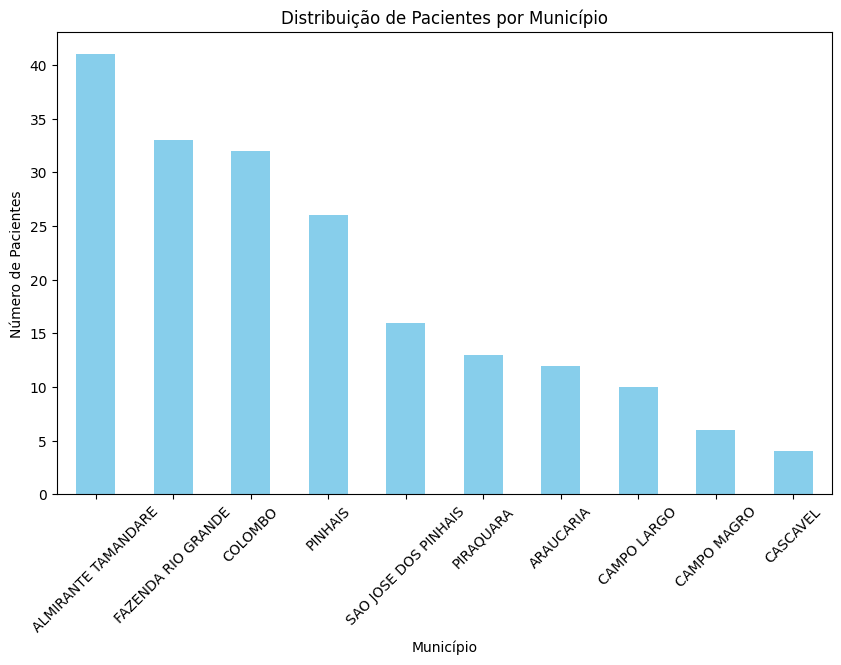

In [76]:
plt.figure(figsize=(10, 6))
distribuicao_por_municipio.head(10).plot(kind='bar', color='skyblue')  # Exibir os 10 municípios com maior demanda
plt.title('Distribuição de Pacientes por Município')
plt.ylabel('Número de Pacientes')
plt.xlabel('Município')
plt.xticks(rotation=45)
plt.show()

In [78]:
transtornos_mentais_curitiba = transtornos_mentais_limpo[transtornos_mentais_limpo['Municício'] == 'CURITIBA']

transtornos_mentais_curitiba.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Grupo Etário,Grupo CID
35,01/05/2024 00:31:03,1961-11-13,F,2,UPA,2438917,UPA BOQUEIRAO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,CURITIBA,GANCHINHO,Brasileira,1245124,1,1,123518,62,51-65,Esquizofrenia (F20-F29)
122,01/05/2024 02:29:48,1998-04-10,F,2,UPA,5323436,UPA CAJURU,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,CURITIBA,CAJURU,Brasileira,2400783,1,1,123492,26,19-35,Uso de substâncias psicoativas (F10-F19)
129,01/05/2024 02:54:36,1992-03-21,F,2,UPA,2639467,UPA FAZENDINHA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,CURITIBA,CIDADE INDUSTRIAL,Brasileira,104898,1,1,117965,32,19-35,Transtornos neuróticos (F40-F48)
251,01/05/2024 06:50:10,1967-07-20,M,2,UPA,2438917,UPA BOQUEIRAO,301060029,ATENDIMENTO DE URGENCIA C/ OBSERVACAO ATE 24 H...,225125,...,CURITIBA,CENTRO,Brasileira,408635,1,1,115248,57,51-65,Uso de substâncias psicoativas (F10-F19)
332,01/05/2024 07:48:30,1978-01-06,F,2,UPA,3827836,UPA PINHEIRINHO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,CURITIBA,PINHEIRINHO,Brasileira,1149302,1,1,42436,46,36-50,Transtornos neuróticos (F40-F48)


In [114]:
# Contar o número de pacientes por bairro
distribuicao_por_bairro = transtornos_mentais_curitiba['Bairro'].value_counts()

# Exibir a distribuição de pacientes por bairro
distribuicao_por_bairro.head()

,count
Bairro,
CIDADE INDUSTRIAL,5650
SITIO CERCADO,3436
BOQUEIRAO,2114
CAJURU,2111
UBERABA,1950


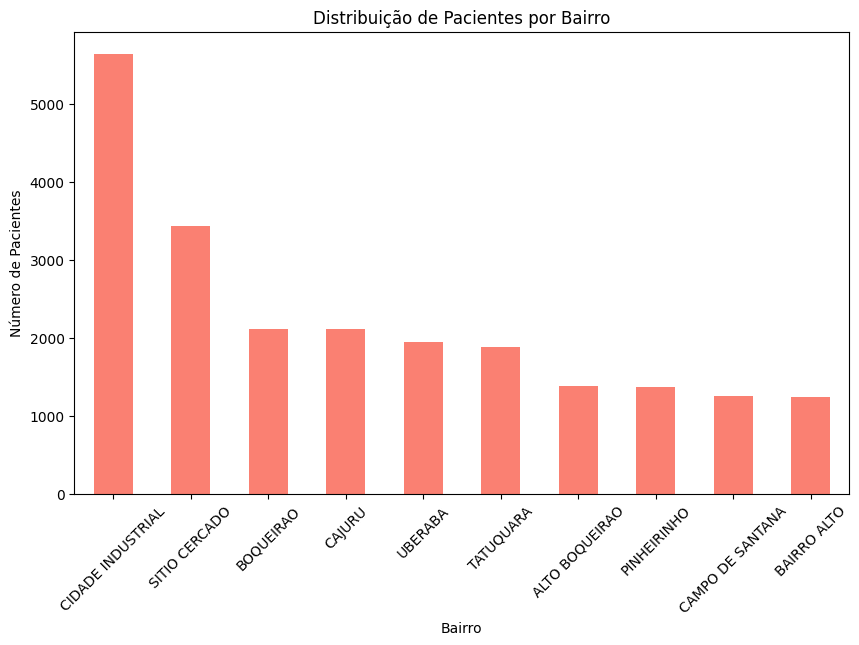

In [84]:
plt.figure(figsize=(10, 6))
distribuicao_por_bairro.head(10).plot(kind='bar', color='salmon')  # Exibir os 10 bairros com maior demanda
plt.title('Distribuição de Pacientes por Bairro')
plt.ylabel('Número de Pacientes')
plt.xlabel('Bairro')
plt.xticks(rotation=45)
plt.show()

In [95]:
transtornos_mentais_cic = transtornos_mentais_limpo[transtornos_mentais_limpo['Bairro'] == 'CIDADE INDUSTRIAL']

transtornos_mentais_cic.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Grupo Etário,Grupo CID
129,01/05/2024 02:54:36,1992-03-21,F,2,UPA,2639467,UPA FAZENDINHA,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,CURITIBA,CIDADE INDUSTRIAL,Brasileira,104898,1,1,117965,32,19-35,Transtornos neuróticos (F40-F48)
367,01/05/2024 10:44:41,2016-06-20,M,3,SIACE,3270785,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,301010072,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,225112,...,CURITIBA,CIDADE INDUSTRIAL,Brasileira,9480844,1,1,34975,8,0-18,Transtornos do desenvolvimento psicológico (F8...
387,01/05/2024 09:37:26,2011-11-21,M,3,SIACE,3270785,CENTRO DE ESPECIALIDADES SANTA FELICIDADE,301010072,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,225112,...,CURITIBA,CIDADE INDUSTRIAL,Brasileira,8386288,1,1,34975,12,0-18,Transtornos do desenvolvimento psicológico (F8...
502,01/05/2024 07:35:02,1944-01-22,M,1,BASICO,17302,UMS OSWALDO CRUZ PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225142,...,CURITIBA,CIDADE INDUSTRIAL,Brasileira,1823931,1,1,21140,80,66+,Transtornos de personalidade (F60-F69)
716,01/05/2024 08:13:05,2016-03-30,M,3,SIACE,15466,CENTRO DE ESPECIALIDADES MEDICAS ENCANTAR,301010072,CONSULTA MEDICA EM ATENCAO ESPECIALIZADA,225112,...,CURITIBA,CIDADE INDUSTRIAL,Brasileira,9622765,1,1,4996,8,0-18,Transtornos do desenvolvimento psicológico (F8...


In [98]:
doencas_cic = transtornos_mentais_cic['Descrição do CID'].value_counts().reset_index()
doencas_cic.columns = ['Descrição do CID', 'Quantidade']

doencas_cic.head(10)

,Descrição do CID,Quantidade
0,TRANSTORNO ANSIOSO NAO ESPECIFICADO,831
1,AUTISMO INFANTIL,472
2,TRANSTORNO MISTO ANSIOSO E DEPRESSIVO,298
3,DISTURBIOS DA ATIVIDADE E DA ATENCAO,252
4,EPISODIO DEPRESSIVO NAO ESPECIFICADO,240
5,TRANSTORNO DO HUMOR [AFETIVO] NAO ESPECIFICADO,225
6,EPISODIO DEPRESSIVO MODERADO,204
7,TRANSTORNO AFETIVO BIPOLAR NAO ESPECIFICADO,168
8,ESQUIZOFRENIA PARANOIDE,139
9,EPISODIO DEPRESSIVO LEVE,120


In [100]:
transtornos_mentais_sitio_cercado = transtornos_mentais_limpo[transtornos_mentais_limpo['Bairro'] == 'SITIO CERCADO']

transtornos_mentais_sitio_cercado.head()

,Data do Atendimento,Data de Nascimento,Sexo,Código do Tipo de Unidade,Tipo de Unidade,Código da Unidade,Descrição da Unidade,Código do Procedimento,Descrição do Procedimento,Código do CBO,...,Municício,Bairro,Nacionalidade,cod_usuario,origem_usuario,residente,cod_profissional,Idade,Grupo Etário,Grupo CID
532,01/05/2024 08:05:12,1957-10-27,F,1,BASICO,16993,UMS SAO JOAO DEL REY PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225142,...,CURITIBA,SITIO CERCADO,Brasileira,11453447,1,1,31402,66,66+,Transtornos mentais orgânicos (F00-F09)
734,01/05/2024 08:12:01,1990-08-22,M,1,BASICO,16942,UMS OSTERNACK PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225130,...,CURITIBA,SITIO CERCADO,Brasileira,669131,1,1,39697,34,19-35,Transtornos do humor (F30-F39)
2726,01/05/2024 12:03:08,1972-07-23,F,2,UPA,2639556,UPA SITIO CERCADO,301060096,ATENDIMENTO MEDICO EM UNIDADE DE PRONTO ATENDI...,225125,...,CURITIBA,SITIO CERCADO,Brasileira,11757233,1,1,123205,52,51-65,Esquizofrenia (F20-F29)
2812,01/05/2024 12:11:17,1975-02-03,M,1,BASICO,2639394,UMS XAPINHAL PSF,802029981,PROCEDIMENTO ADMINISTRATIVO,225142,...,CURITIBA,SITIO CERCADO,Brasileira,644526,1,1,14104,49,36-50,Esquizofrenia (F20-F29)
3593,01/05/2024 14:49:58,1961-09-15,F,1,BASICO,16977,UMS JOAO CANDIDO PSF,301010064,CONSULTA MEDICA EM ATENCAO PRIMARIA,225142,...,CURITIBA,SITIO CERCADO,Brasileira,1799122,1,1,21411,63,51-65,Transtornos neuróticos (F40-F48)


In [101]:
doencas_sitio = transtornos_mentais_sitio_cercado['Descrição do CID'].value_counts().reset_index()
doencas_sitio.columns = ['Descrição do CID', 'Quantidade']

doencas_sitio.head(10)

,Descrição do CID,Quantidade
0,TRANSTORNO ANSIOSO NAO ESPECIFICADO,487
1,AUTISMO INFANTIL,274
2,DISTURBIOS DA ATIVIDADE E DA ATENCAO,193
3,TRANSTORNO MISTO ANSIOSO E DEPRESSIVO,163
4,EPISODIO DEPRESSIVO MODERADO,146
5,EPISODIO DEPRESSIVO NAO ESPECIFICADO,131
6,ESQUIZOFRENIA PARANOIDE,126
7,TRANSTORNO DO HUMOR [AFETIVO] NAO ESPECIFICADO,105
8,TRANSTORNO DE PANICO [ANSIEDADE PAROXISTICA EP...,94
9,INSONIA NAO-ORGANICA,84


## Condições de Vida

In [104]:
# Agrupar por tipo de habitação e número de cômodos, contando o número de pacientes em cada grupo
grupo_habitacao_comodos = transtornos_mentais_limpo.groupby(['Tipo de Habitação', 'Cômodos']).size().reset_index(name='Número de Pacientes')

# Exibir a tabela com o agrupamento
grupo_habitacao_comodos.head()

,Tipo de Habitação,Cômodos,Número de Pacientes
0,MADEIRA APARELHADA,-4.0,2
1,MADEIRA APARELHADA,1.0,10
2,MADEIRA APARELHADA,2.0,116
3,MADEIRA APARELHADA,3.0,286
4,MADEIRA APARELHADA,4.0,436


In [145]:
grupo_habitacao_comodos_filtro = grupo_habitacao_comodos.query("Cômodos >= 1 and Cômodos < 20")

grupo_habitacao_comodos_filtro.head()

,Tipo de Habitação,Cômodos,Número de Pacientes
1,MADEIRA APARELHADA,1.0,10
2,MADEIRA APARELHADA,2.0,116
3,MADEIRA APARELHADA,3.0,286
4,MADEIRA APARELHADA,4.0,436
5,MADEIRA APARELHADA,5.0,668


In [147]:
grupo_habitacao_comodos_filtro.sort_values(by='Número de Pacientes', ascending=False).head(10)

,Tipo de Habitação,Cômodos,Número de Pacientes
70,TIJOLO/ALVENARIA COM REVESTIMENTO,5.0,13062
71,TIJOLO/ALVENARIA COM REVESTIMENTO,6.0,6715
69,TIJOLO/ALVENARIA COM REVESTIMENTO,4.0,4884
72,TIJOLO/ALVENARIA COM REVESTIMENTO,7.0,1910
68,TIJOLO/ALVENARIA COM REVESTIMENTO,3.0,1699
73,TIJOLO/ALVENARIA COM REVESTIMENTO,8.0,1249
5,MADEIRA APARELHADA,5.0,668
75,TIJOLO/ALVENARIA COM REVESTIMENTO,10.0,466
67,TIJOLO/ALVENARIA COM REVESTIMENTO,2.0,453
4,MADEIRA APARELHADA,4.0,436


In [143]:
grupo_habitacao_comodos_filtro = grupo_habitacao_comodos_filtro[grupo_habitacao_comodos_filtro['Número de Pacientes'] < 1000]

grupo_habitacao_comodos_filtro.head()


,Tipo de Habitação,Cômodos,Número de Pacientes
1,MADEIRA APARELHADA,1.0,10
2,MADEIRA APARELHADA,2.0,116
3,MADEIRA APARELHADA,3.0,286
4,MADEIRA APARELHADA,4.0,436
5,MADEIRA APARELHADA,5.0,668


In [130]:
# Agrupar por tipo de habitação, número de cômodos e contar ocorrências de CIDs relacionados a transtornos mentais
grupo_habitacao_comodos_cid = transtornos_mentais_limpo.groupby(['Tipo de Habitação', 'Cômodos', 'Descrição do CID']).size().reset_index(name='Número de Ocorrências')

# Exibir a tabela com o agrupamento por CID
grupo_habitacao_comodos_cid.head()

,Tipo de Habitação,Cômodos,Descrição do CID,Número de Ocorrências
0,MADEIRA APARELHADA,-4.0,RETARDO MENTAL LEVE - SEM MENCAO DE COMPROMETI...,2
1,MADEIRA APARELHADA,1.0,EPISODIO DEPRESSIVO MODERADO,1
2,MADEIRA APARELHADA,1.0,OUTROS TRANSTORNOS DO DESENVOLVIMENTO DAS HABI...,2
3,MADEIRA APARELHADA,1.0,RETARDO MENTAL LEVE - COMPROMETIMENTO SIGNIF. ...,2
4,MADEIRA APARELHADA,1.0,TRANSTORNO ANSIOSO NAO ESPECIFICADO,1


In [133]:
grupo_habitacao_comodos_cid = grupo_habitacao_comodos_cid.query('Cômodos >= 1 and Cômodos < 20')

grupo_habitacao_comodos_cid.head()

,Tipo de Habitação,Cômodos,Descrição do CID,Número de Ocorrências
1,MADEIRA APARELHADA,1.0,EPISODIO DEPRESSIVO MODERADO,1
2,MADEIRA APARELHADA,1.0,OUTROS TRANSTORNOS DO DESENVOLVIMENTO DAS HABI...,2
3,MADEIRA APARELHADA,1.0,RETARDO MENTAL LEVE - COMPROMETIMENTO SIGNIF. ...,2
4,MADEIRA APARELHADA,1.0,TRANSTORNO ANSIOSO NAO ESPECIFICADO,1
5,MADEIRA APARELHADA,1.0,TRANSTORNO DO DESENVOLVIMENTO PSICOLOGICO NAO ...,1


In [134]:
grupo_habitacao_comodos_cid.to_csv('grupo_habitacao_comodos_cid.csv', sep=';')

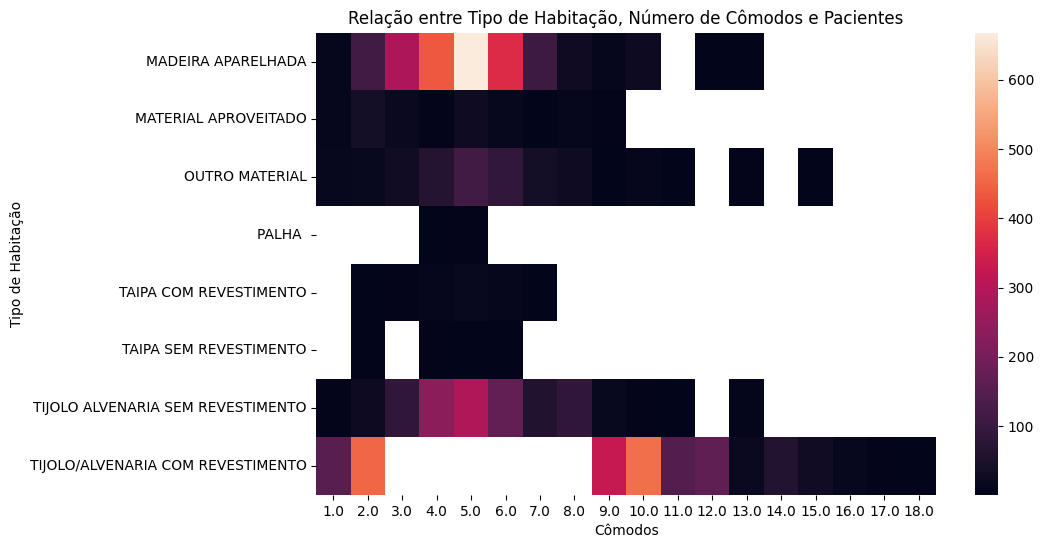

In [137]:
# Gráfico de calor da relação entre tipo de habitação, número de cômodos e número de pacientes
plt.figure(figsize=(10, 6))
pivot_habitacao_comodos = grupo_habitacao_comodos_filtro.pivot(index='Tipo de Habitação', columns='Cômodos', values='Número de Pacientes')
sns.heatmap(pivot_habitacao_comodos)
plt.title('Relação entre Tipo de Habitação, Número de Cômodos e Pacientes')
plt.show()

# Agrupando e Analisando por Tipo de Transtorno

In [34]:
def categorizar_cid(cid):
    if pd.isna(cid):  # Verificar valores nulos
        return 'CID Indefinido'
    if cid.startswith('F0'):
        return 'Transtornos mentais orgânicos (F00-F09)'
    elif cid.startswith('F1'):
        return 'Uso de substâncias psicoativas (F10-F19)'
    elif cid.startswith('F2'):
        return 'Esquizofrenia (F20-F29)'
    elif cid.startswith('F3') :
        return 'Transtornos do humor (F30-F39)'
    elif cid.startswith('F4') :
        return 'Transtornos neuróticos (F40-F48)'
    elif cid.startswith('F5') :
        return 'Síndromes comportamentais (F50-F59)'
    elif cid.startswith('F6') :
        return 'Transtornos de personalidade (F60-F69)'
    elif cid.startswith('F7') :
        return 'Retardo mental (F70-F79)'
    elif cid.startswith('F8') :
        return 'Transtornos do desenvolvimento psicológico (F80-F89)'
    elif cid.startswith('F9') :
        return 'Transtornos emocionais (F90-F98)'
    elif cid == 'F99':
        return 'Transtorno mental não especificado (F99)'
    else:
        return 'Outros CID'

In [35]:
transtornos_mentais_limpo['Grupo CID'] = transtornos_mentais_limpo['Código do CID'].apply(categorizar_cid)

<ipython-input-35-75f392a2d0d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transtornos_mentais_limpo['Grupo CID'] = transtornos_mentais_limpo['Código do CID'].apply(categorizar_cid)


In [36]:
# Contar a distribuição por grupo de CID
distribuicao_cid = transtornos_mentais_limpo['Grupo CID'].value_counts().reset_index()

# Renomear as colunas para melhor entendimento
distribuicao_cid.columns = ['Grupo CID', 'Quantidade']

# Exibir a distribuição
distribuicao_cid

,Grupo CID,Quantidade
0,Transtornos do humor (F30-F39),11078
1,Transtornos neuróticos (F40-F48),9115
2,Transtornos do desenvolvimento psicológico (F8...,5043
3,Transtornos emocionais (F90-F98),3806
4,Uso de substâncias psicoativas (F10-F19),3702
5,Esquizofrenia (F20-F29),3044
6,Transtornos mentais orgânicos (F00-F09),1888
7,Síndromes comportamentais (F50-F59),1301
8,Transtornos de personalidade (F60-F69),1142
9,Retardo mental (F70-F79),554


In [37]:
grupo = transtornos_mentais_limpo.groupby(['Grupo CID'])

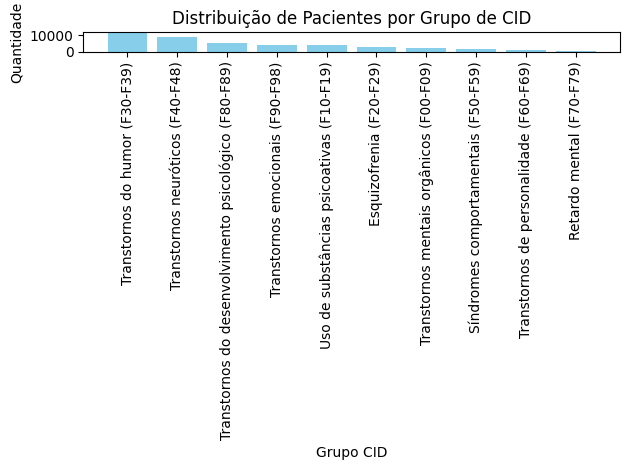

In [38]:
plt.bar(distribuicao_cid['Grupo CID'], distribuicao_cid['Quantidade'], color='skyblue')
plt.xlabel('Grupo CID')
plt.ylabel('Quantidade')
plt.title('Distribuição de Pacientes por Grupo de CID')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [43]:
cid_ocorrencias = transtornos_mentais_limpo.groupby(['Grupo CID', 'Descrição do CID']).size().reset_index(name='Ocorrências').sort_values(by='Grupo CID', ascending=False)

cid_ocorrencias.head()

,Grupo CID,Descrição do CID,Ocorrências
357,Uso de substâncias psicoativas (F10-F19),TRANSTORNOS MENTAIS E COMPORT. DEVIDOS USO DE ...,140
308,Uso de substâncias psicoativas (F10-F19),TRANSTORNOS MENTAIS E COMPORT. DEV. USO ALUCIN...,8
323,Uso de substâncias psicoativas (F10-F19),TRANSTORNOS MENTAIS E COMPORT. DEV. USO COCAIN...,58
322,Uso de substâncias psicoativas (F10-F19),TRANSTORNOS MENTAIS E COMPORT. DEV. USO COCAIN...,21
321,Uso de substâncias psicoativas (F10-F19),TRANSTORNOS MENTAIS E COMPORT. DEV. USO COCAIN...,146


# Criar Fixa de usuário e transtorno



In [ ]:
# Criar uma pasta para armazenar os arquivos CSV de cada paciente
output_dir = 'historico_pacientes'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Agrupar os dados por paciente (cod_usuario)
grupos_pacientes = filtro_codigo_do_transtornos_mentais.groupby('cod_usuario')

# Criar um arquivo CSV para cada paciente com o histórico de atendimentos
for cod_usuario, grupo in grupos_pacientes:
    # Nome do arquivo para cada paciente
    nome_arquivo = f"{output_dir}/paciente_{cod_usuario}.csv"

    # Salvar o histórico de cada paciente em um arquivo CSV separado
    grupo.to_csv(nome_arquivo, index=False, sep=";")

A saída de streaming foi truncada nas últimas 5000 linhas.
Arquivo criado para o paciente 11430803: historico_pacientes/paciente_11430803.csv
Arquivo criado para o paciente 11430927: historico_pacientes/paciente_11430927.csv
Arquivo criado para o paciente 11430967: historico_pacientes/paciente_11430967.csv
Arquivo criado para o paciente 11431003: historico_pacientes/paciente_11431003.csv
Arquivo criado para o paciente 11431194: historico_pacientes/paciente_11431194.csv
Arquivo criado para o paciente 11431266: historico_pacientes/paciente_11431266.csv
Arquivo criado para o paciente 11431357: historico_pacientes/paciente_11431357.csv
Arquivo criado para o paciente 11431416: historico_pacientes/paciente_11431416.csv
Arquivo criado para o paciente 11431596: historico_pacientes/paciente_11431596.csv
Arquivo criado para o paciente 11431776: historico_pacientes/paciente_11431776.csv
Arquivo criado para o paciente 11431786: historico_pacientes/paciente_11431786.csv
Arquivo criado para o pacien

In [ ]:
def remover_acentos_e_caracteres_estranhos(texto):
    # Remove acentos
    texto = unicodedata.normalize('NFKD', texto).encode('ASCII', 'ignore').decode('ASCII')

    # Remove aspas simples e duplas
    texto = re.sub(r"[\"']", '', texto)

    # Remove qualquer outro caractere que não seja letra, número ou espaço
    return re.sub(r'[^a-zA-Z0-9\s]', '', texto)

In [ ]:
output_dir = 'historico_doencas'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Agrupar os dados por paciente (cod_usuario)
grupos_doencas = filtro_codigo_do_transtornos_mentais.groupby('Descrição do CID')

# Criar um arquivo CSV para cada paciente com o histórico de atendimentos
for descricao_doenca, grupo in grupos_doencas:

    if(grupo.size >= 10):
      # Nome do arquivo para cada paciente
      nome_arquivo = f"{output_dir}/descricao_{remover_acentos_e_caracteres_estranhos(descricao_doenca)}.csv"

      # Salvar o histórico de cada paciente em um arquivo CSV separado
      grupo.to_csv(nome_arquivo, index=False, sep=";", encoding='utf-8')

Arquivo criado para o paciente ABUSO DE SUBSTANCIAS QUE NAO PRODUZEM DEPENDENCIA: historico_doencas/descricao_ABUSO DE SUBSTANCIAS QUE NAO PRODUZEM DEPENDENCIA.csv
Arquivo criado para o paciente AGORAFOBIA: historico_doencas/descricao_AGORAFOBIA.csv
Arquivo criado para o paciente AMNESIA DISSOCIATIVA: historico_doencas/descricao_AMNESIA DISSOCIATIVA.csv
Arquivo criado para o paciente ANOREXIA NERVOSA: historico_doencas/descricao_ANOREXIA NERVOSA.csv
Arquivo criado para o paciente ANSIEDADE GENERALIZADA: historico_doencas/descricao_ANSIEDADE GENERALIZADA.csv
Arquivo criado para o paciente AUSENCIA OU PERDA DO DESEJO SEXUAL: historico_doencas/descricao_AUSENCIA OU PERDA DO DESEJO SEXUAL.csv
Arquivo criado para o paciente AUTISMO ATIPICO: historico_doencas/descricao_AUTISMO ATIPICO.csv
Arquivo criado para o paciente AUTISMO INFANTIL: historico_doencas/descricao_AUTISMO INFANTIL.csv
Arquivo criado para o paciente AVERSAO SEXUAL E AUSENCIA DE PRAZER SEXUAL: historico_doencas/descricao_AVERS